# Introduction

In this project, we will examine the data and build different machine learning models 
that will detect if the mushroom is edible or poisonous by its specifications like cap shape, 
cap color, gill color, etc. using different classifiers.

Dataset

The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms with 23 features
like cap-shape, cap-surface, cap-color,Gill size,Gill color,Gill attachment,ring number,ring type bruises, odor, etc.


In [587]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [588]:
df=pd.read_csv('Mushroom_project.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [589]:
df.shape # checking the data 

(8124, 23)

In [590]:
pd.set_option('display.max_rows',None)

In [591]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [592]:
#Using one label Encoder to change data types
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["class"]=LE.fit_transform(df["class"])
df["cap-shape"]=LE.fit_transform(df["cap-shape"])
df["cap-surface"]=LE.fit_transform(df["cap-surface"])
df["cap-color"]=LE.fit_transform(df["cap-color"])
df["bruises"]=LE.fit_transform(df["bruises"])
df["odor"]=LE.fit_transform(df["odor"])
df["gill-attachment"]=LE.fit_transform(df["gill-attachment"])
df["gill-spacing"]=LE.fit_transform(df["gill-spacing"])
df["gill-size"]=LE.fit_transform(df["gill-size"])
df["gill-color"]=LE.fit_transform(df["gill-color"])
df["stalk-shape"]=LE.fit_transform(df["stalk-shape"])
df["stalk-root"]=LE.fit_transform(df["stalk-root"])
df["stalk-surface-above-ring"]=LE.fit_transform(df["stalk-surface-above-ring"])
df["stalk-surface-below-ring"]=LE.fit_transform(df["stalk-surface-below-ring"])
df["stalk-color-above-ring"]=LE.fit_transform(df["stalk-color-above-ring"])
df["stalk-color-below-ring"]=LE.fit_transform(df["stalk-color-below-ring"])
df["veil-type"]=LE.fit_transform(df["veil-type"])
df["veil-color"]=LE.fit_transform(df["veil-color"])
df["ring-number"]=LE.fit_transform(df["ring-number"])
df["ring-type"]=LE.fit_transform(df["ring-type"])
df["spore-print-color"]=LE.fit_transform(df["spore-print-color"])
df["population"]=LE.fit_transform(df["population"])
df["habitat"]=LE.fit_transform(df["habitat"])

In [593]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [594]:
df["veil-type"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [595]:
df = df.drop(["veil-type"],axis=1) #The column “veil-type” is 0 and not contributing to the data so we will remove it

In [596]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


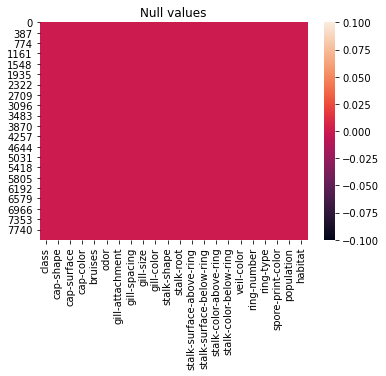

In [597]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

#There is no null values in the dataset

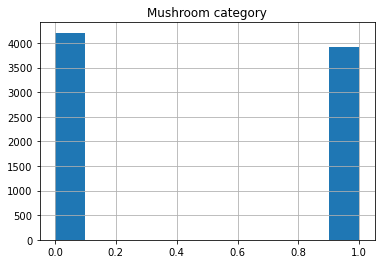

In [598]:
df['class'].hist(grid=True)
plt.title("Mushroom category")
plt.show()

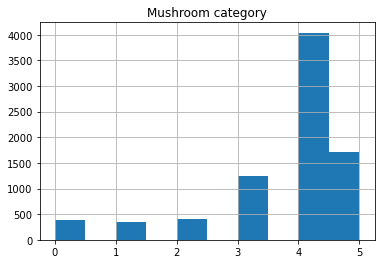

In [599]:
df["population"].hist(grid=True)
plt.title("Mushroom category")
plt.show()

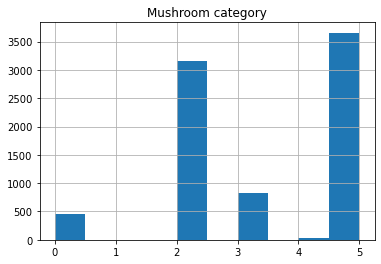

In [600]:
df["cap-shape"].hist(grid=True)
plt.title("Mushroom category")
plt.show()

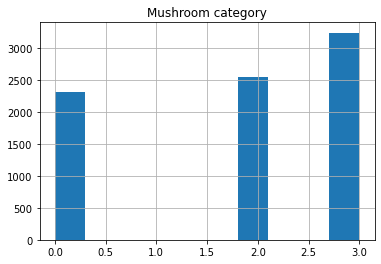

In [601]:
df["cap-surface"].hist(grid=True)
plt.title("Mushroom category")
plt.show()

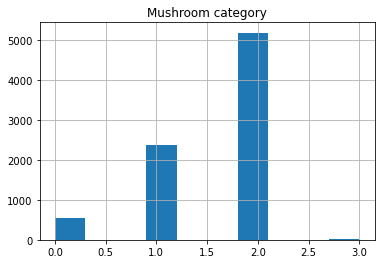

In [602]:
df["stalk-surface-above-ring"].hist(grid=True)
plt.title("Mushroom category")
plt.show()


In [603]:
dfcor=df.corr()
dfcor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


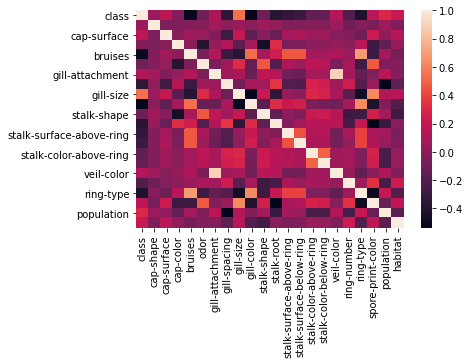

In [604]:
sns.heatmap(dfcor)

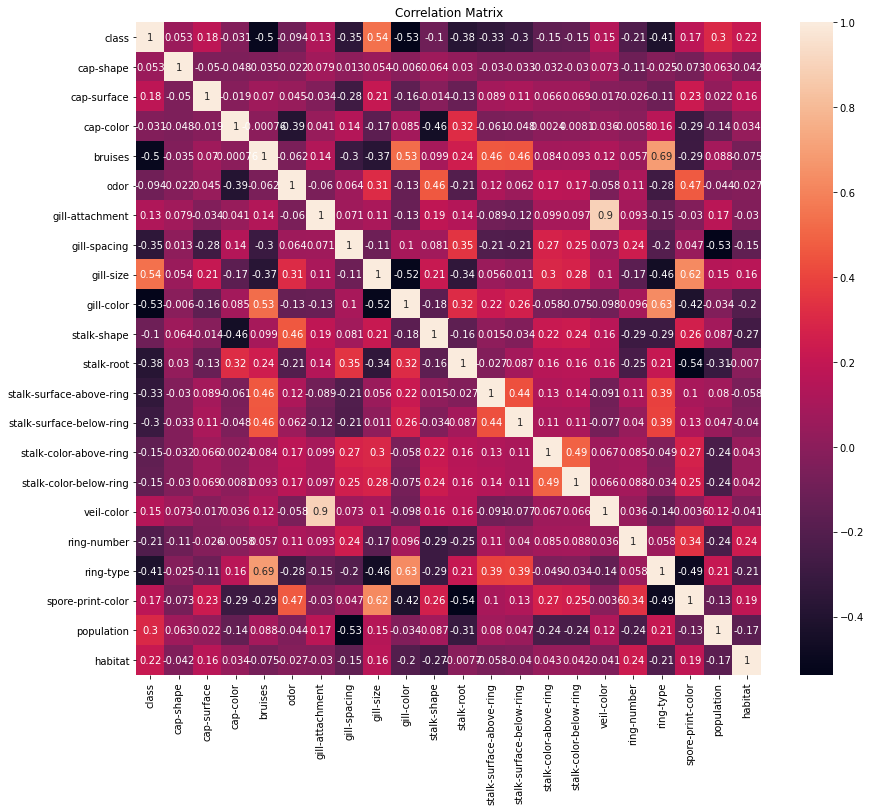

In [605]:
plt.figure(figsize=(14,12))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [606]:
corr_matrix=df.corr()

In [607]:
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

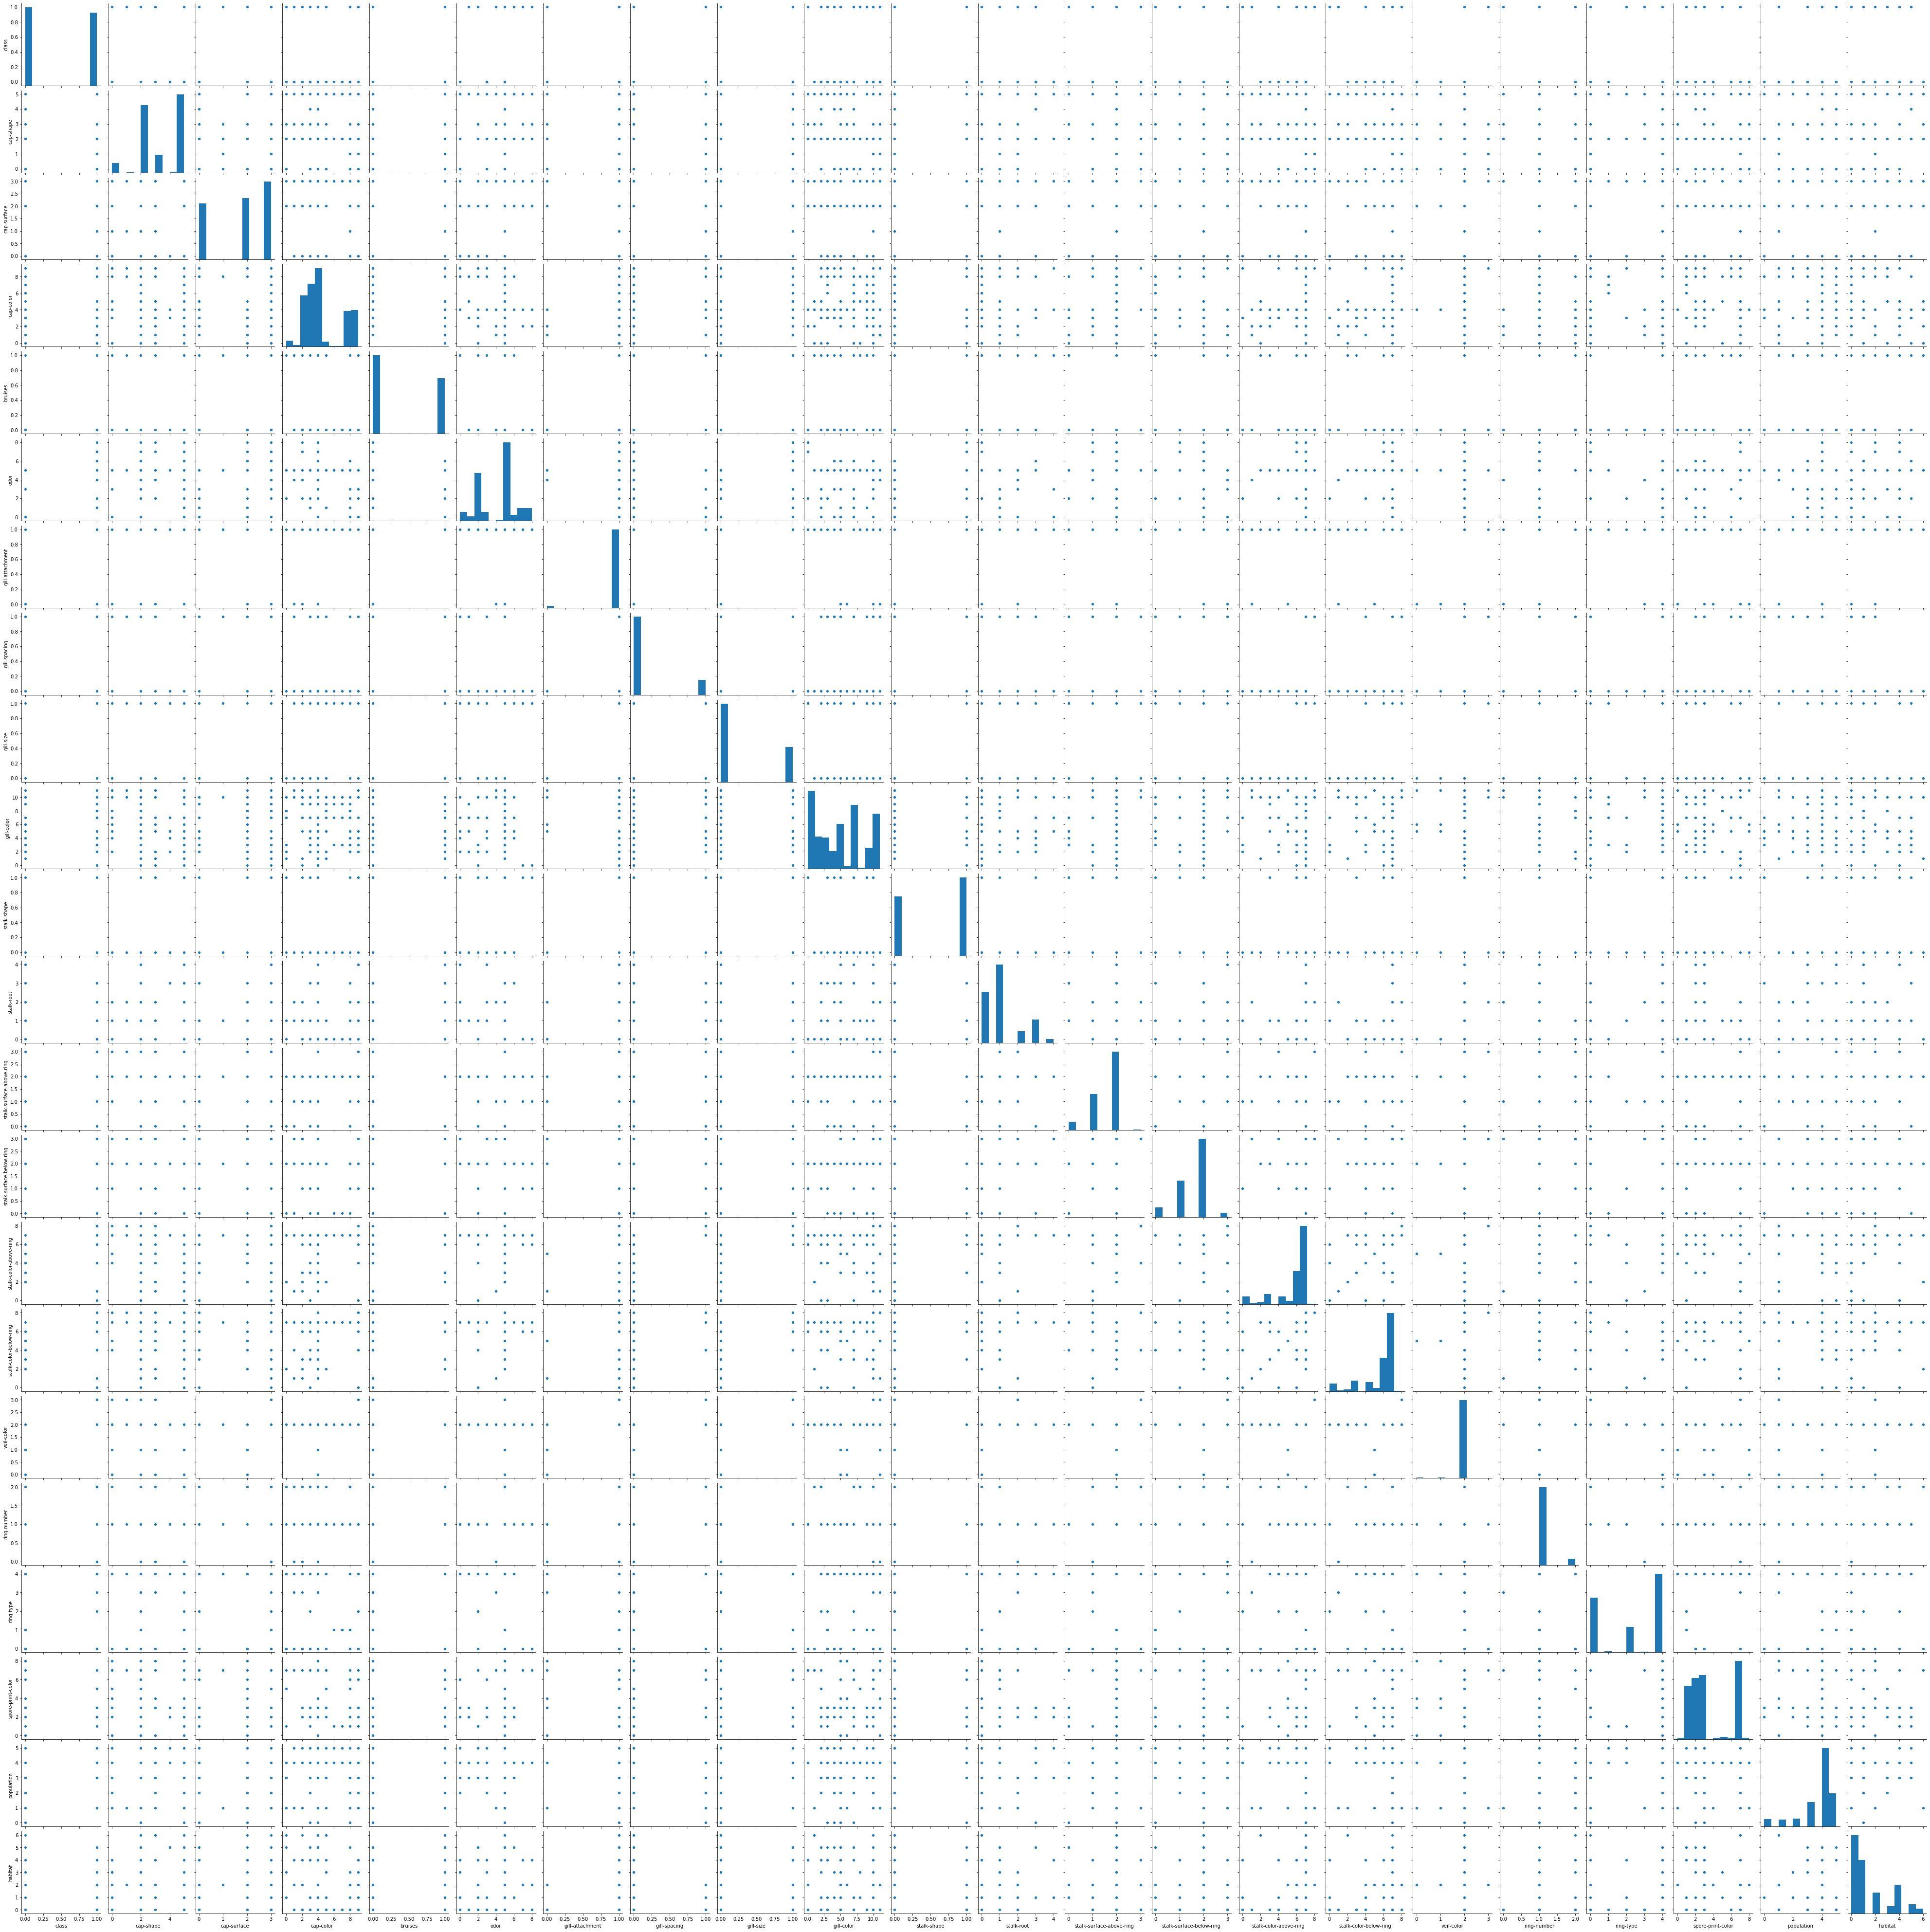

In [608]:
sns.pairplot(df) #to check skewness
plt.show()

In [609]:
# spliting the independent and target variables in x and y
x=df.drop("class",axis=1)
y=df["class"]

In [610]:
x.skew() #To check skewness

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [611]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [612]:
x=df_new #Skewness has been removed

#Checking outliers

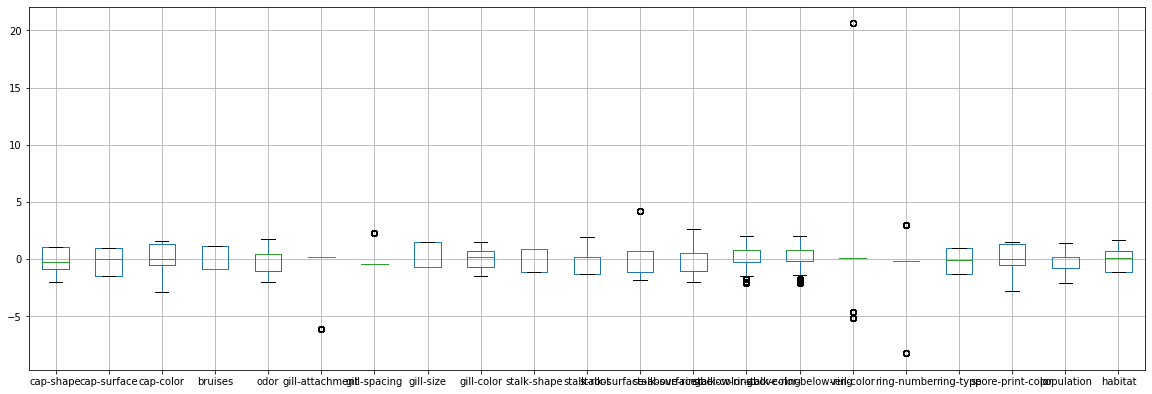

In [613]:
#Plotting boxplots 
x.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [614]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [615]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [616]:
z[45][1]

1.029712237713905

Finding best random_state

In [617]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  1.0 on Random_state 3


Creating train-test split

In [618]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

In [619]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [620]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [621]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [622]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We will check cross validation to find out best model

In [623]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.8181541492989769


In [624]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 0.9202115953012505


In [625]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.8638184918529745


In [626]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.8854875331564986


Minimum difference in accuracy and cross validation score is for DecisionTreeClassifier(9)so this is our best model

Hyper parameter tuning

In [627]:
from sklearn.model_selection import GridSearchCV

In [628]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [629]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [630]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [631]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'gini', 'max_depth': 7}

In [632]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [633]:
accuracy_score(y_test,GCV_pred)

1.0

In [635]:
import joblib
joblib.dump(GCV.best_estimator_,"MashroomModerDTC.pkl")

['MashroomModerDTC.pkl']